# 05wk-2: 딥러닝의 기초 (5)

최규빈  
2022-10-04

> 깊은신경망(1)– 로지스틱 회귀의 한계, DNN을 이용한 해결, DNN으로
> 해결가능한 다양한 예제

# 강의영상

> <https://youtube.com/playlist?list=PLQqh36zP38-yLHMwQLokXiLhTZefRlSXY>

# imports

In [8]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 로지스틱 회귀의 한계

## 신문기사 (데이터의 모티브)

`-` [스펙이 높아도 취업이 안된다고
합니다..](https://www.joongang.co.kr/article/23637092#home)

**중소·지방 기업 “뽑아봤자 그만두니까”**

중소기업 관계자들은 고스펙 지원자를 꺼리는 이유로 높은 퇴직률을 꼽는다.
여건이 좋은 대기업으로 이직하거나 회사를 관두는 경우가 많다는
하소연이다. 고용정보원이 지난 3일 공개한 자료에 따르면 중소기업
청년취업자 가운데 49.5%가 2년 내에 회사를 그만두는 것으로 나타났다.

중소 IT업체 관계자는 “기업 입장에서 가장 뼈아픈 게 신입사원이 그만둬서
새로 뽑는 일”이라며 “명문대 나온 스펙 좋은 지원자를 뽑아놔도 1년을
채우지 않고 그만두는 사원이 대부분이라 우리도 눈을 낮춰 사람을 뽑는다”고
말했다.

## 가짜데이터

`-` 위의 기사를 모티브로 한 데이터

In [9]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/main/posts/II.%20DNN/2022-10-04-dnnex0.csv')
df

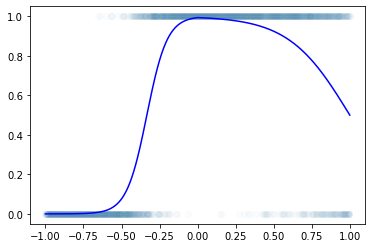

In [10]:
plt.plot(df.x,df.y,'o',alpha=0.02)
plt.plot(df.x,df.underlying,'-b')

## 로지스틱 회귀로 적합

In [4]:
x= torch.tensor(df.x).float().reshape(-1,1)
y= torch.tensor(df.y).float().reshape(-1,1)

In [5]:
net = torch.nn.Sequential(
    torch.nn.Linear(1,1),
    torch.nn.Sigmoid()
)
yhat=net(x)

In [6]:
loss_fn = torch.nn.BCELoss() 
loss = loss_fn(yhat,y) # loss = -torch.mean((y)*torch.log(yhat)+(1-y)*torch.log(1-yhat))
loss

In [7]:
optimizr = torch.optim.Adam(net.parameters()) 

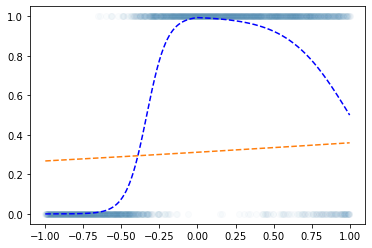

In [8]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(df.x,df.underlying,'--b')
plt.plot(x,net(x).data,'--')

In [9]:
for epoc in range(6000):
    ## 1 
    yhat = net(x) 
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad() 

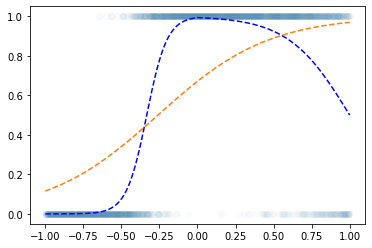

In [10]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(df.x,df.underlying,'--b')
plt.plot(x,net(x).data,'--')

`-` Epoch을 한 6억번 넣어도 이건 못 맞출 것 같다 (증가하다가 감소하는
underlying을 설계하는 것이 불가능) $\to$ 모형의 표현력이 너무 낮다.

## 해결책

`-` sigmoid 넣기 전의 상태가 꺽인 그래프 이어야 한다.

In [11]:
sig = torch.nn.Sigmoid()

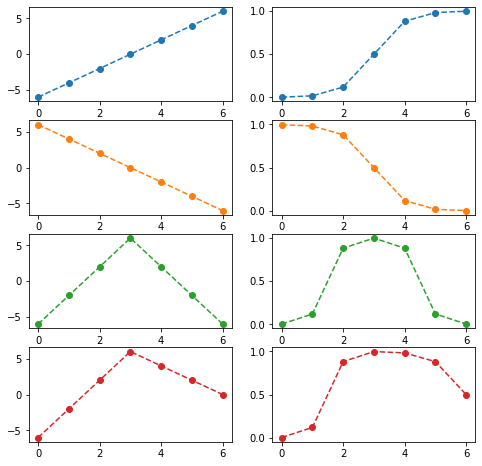

In [12]:
fig,ax = plt.subplots(4,2,figsize=(8,8))
u1 = torch.tensor([-6,-4,-2,0,2,4,6])
u2 = torch.tensor([6,4,2,0,-2,-4,-6])
u3 = torch.tensor([-6,-2,2,6,2,-2,-6])
u4 = torch.tensor([-6,-2,2,6,4,2,0])
ax[0,0].plot(u1,'--o',color='C0');ax[0,1].plot(sig(u1),'--o',color='C0')
ax[1,0].plot(u2,'--o',color='C1');ax[1,1].plot(sig(u2),'--o',color='C1')
ax[2,0].plot(u3,'--o',color='C2');ax[2,1].plot(sig(u3),'--o',color='C2')
ax[3,0].plot(u4,'--o',color='C3');ax[3,1].plot(sig(u4),'--o',color='C3')

# DNN을 이용한 해결

`-` 목표: 아래와 같은 벡터 ${\boldsymbol u}$를 만들어보자.

${\boldsymbol u} = [u_1,u_2,\dots,u_{2000}], \quad u_i = \begin{cases} 9x_i +4.5& x_i <0 \\ -4.5x_i + 4.5& x_i >0 \end{cases}$

## 꺽인 그래프를 만드는 방법1

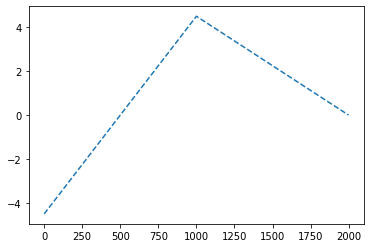

In [13]:
u = [9*xi+4.5 if xi <0 else -4.5*xi+4.5 for xi in x.reshape(-1).tolist()]
plt.plot(u,'--')

## 꺽인 그래프를 만드는 방법2

`-` 전략: 선형변환 $\to$ ReLU $\to$ 선형변환

(예비학습) ReLU 함수란?

$ReLU(x) = \max(0,x)$

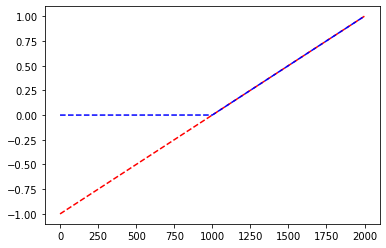

In [14]:
relu=torch.nn.ReLU()
plt.plot(x,'--r')
plt.plot(relu(x),'--b')

-   빨간색: `x`, 파란색: `relu(x)`

예비학습끝

우리 전략 다시 확인: 선형변환1 -\> 렐루 -\> 선형변환2

***(선형변환1)***

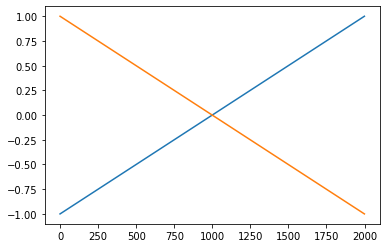

In [15]:
plt.plot(x);plt.plot(-x)

***(렐루)***

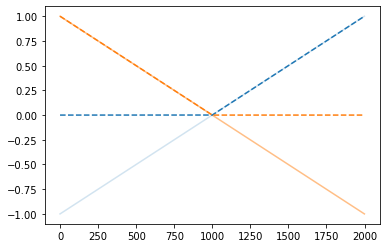

In [16]:
plt.plot(x,alpha=0.2);plt.plot(-x,alpha=0.5)
plt.plot(relu(x),'--',color='C0');plt.plot(relu(-x),'--',color='C1')

***(선형변환2)***

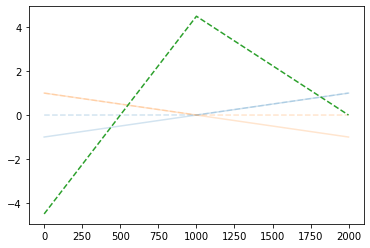

In [17]:
plt.plot(x,alpha=0.2);plt.plot(-x,alpha=0.2)
plt.plot(relu(x),'--',color='C0',alpha=0.2);plt.plot(relu(-x),'--',color='C1',alpha=0.2)
plt.plot(-4.5*relu(x)-9.0*relu(-x)+4.5,'--',color='C2')

이제 초록색선에 sig를 취하기만 하면?

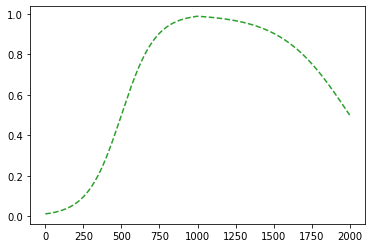

In [18]:
plt.plot(sig(-4.5*relu(x)-9.0*relu(-x)+4.5),'--',color='C2')

정리하면!

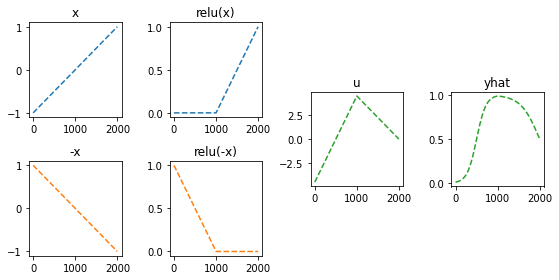

In [19]:
fig = plt.figure(figsize=(8, 4))
spec = fig.add_gridspec(4, 4)
ax1 = fig.add_subplot(spec[:2,0]); ax1.set_title('x'); ax1.plot(x,'--',color='C0')
ax2 = fig.add_subplot(spec[2:,0]); ax2.set_title('-x'); ax2.plot(-x,'--',color='C1')
ax3 = fig.add_subplot(spec[:2,1]); ax3.set_title('relu(x)'); ax3.plot(relu(x),'--',color='C0')
ax4 = fig.add_subplot(spec[2:,1]); ax4.set_title('relu(-x)'); ax4.plot(relu(-x),'--',color='C1')
ax5 = fig.add_subplot(spec[1:3,2]); ax5.set_title('u'); ax5.plot(-4.5*relu(x)-9*relu(-x)+4.5,'--',color='C2')
ax6 = fig.add_subplot(spec[1:3,3]); ax6.set_title('yhat'); ax6.plot(sig(-4.5*relu(x)-9*relu(-x)+4.5),'--',color='C2')
fig.tight_layout()

-   이런느낌으로 $\hat{\boldsymbol y}$을 만들면 된다.

## torch.nn.Linear()를 이용한 꺽인 그래프 구현

In [20]:
torch.manual_seed(43052)
l1 = torch.nn.Linear(in_features=1,out_features=2,bias=True) 
a1 = torch.nn.ReLU()
l2 = torch.nn.Linear(in_features=2,out_features=1,bias=True) 
a2 = torch.nn.Sigmoid() 

In [21]:
net = torch.nn.Sequential(l1,a1,l2,a2) 

In [22]:
l1.weight,l1.bias,l2.weight,l2.bias

In [23]:
l1.weight.data = torch.tensor([[1.0],[-1.0]])
l1.bias.data = torch.tensor([0.0, 0.0])
l2.weight.data = torch.tensor([[ -4.5, -9.0]])
l2.bias.data= torch.tensor([4.5])
l1.weight,l1.bias,l2.weight,l2.bias

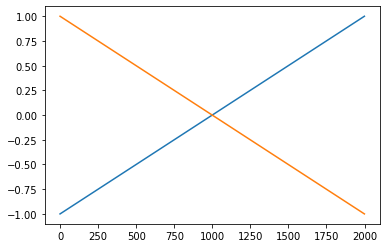

In [24]:
plt.plot(l1(x).data)

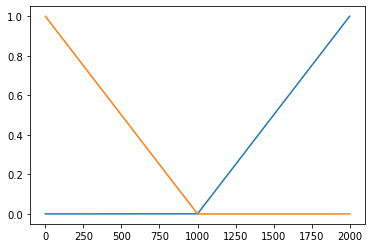

In [25]:
plt.plot(a1(l1(x)).data)

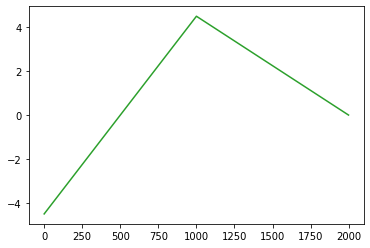

In [26]:
plt.plot(l2(a1(l1(x))).data,color='C2')

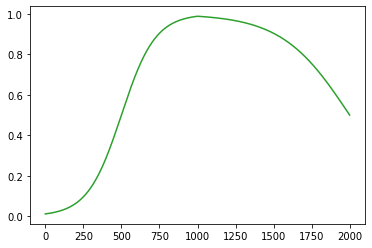

In [27]:
plt.plot(a2(l2(a1(l1(x)))).data,color='C2')
#plt.plot(net(x).data,color='C2')

`-` 수식표현

`(1)` ${\bf X}=\begin{bmatrix} x_1 \\ \dots \\ x_n \end{bmatrix}$

`(2)`
$l_1({\bf X})={\bf X}{\bf W}^{(1)}\overset{bc}{+} {\boldsymbol b}^{(1)}=\begin{bmatrix} x_1 & -x_1 \\ x_2 & -x_2 \\ \dots & \dots \\ x_n & -x_n\end{bmatrix}$

-   ${\bf W}^{(1)}=\begin{bmatrix} 1 & -1 \end{bmatrix}$
-   ${\boldsymbol b}^{(1)}=\begin{bmatrix} 0 & 0 \end{bmatrix}$

`(3)`
$(a_1\circ l_1)({\bf X})=\text{relu}\big({\bf X}{\bf W}^{(1)}\overset{bc}{+}{\boldsymbol b}^{(1)}\big)=\begin{bmatrix} \text{relu}(x_1) & \text{relu}(-x_1) \\ \text{relu}(x_2) & \text{relu}(-x_2) \\ \dots & \dots \\ \text{relu}(x_n) & \text{relu}(-x_n)\end{bmatrix}$

`(4)`
$(l_2 \circ a_1\circ l_1)({\bf X})=\text{relu}\big({\bf X}{\bf W}^{(1)}\overset{bc}{+}{\boldsymbol b}^{(1)}\big){\bf W}^{(2)}\overset{bc}{+}b^{(2)}$

$\quad=\begin{bmatrix} -4.5\times\text{relu}(x_1) -9.0 \times \text{relu}(-x_1) +4.5 \\ -4.5\times\text{relu}(x_2) -9.0 \times\text{relu}(-x_2) + 4.5 \\ \dots \\ -4.5\times \text{relu}(x_n) -9.0 \times\text{relu}(-x_n)+4.5 \end{bmatrix}$

-   ${\bf W}^{(2)}=\begin{bmatrix} -4.5 \\ -9 \end{bmatrix}$
-   $b^{(2)}=4.5$

`(5)`
$net({\bf X})=(a_2 \circ l_2 \circ a_1\circ l_1)({\bf X})=\text{sig}\Big(\text{relu}\big({\bf X}{\bf W}^{(1)}\overset{bc}{+}{\boldsymbol b}^{(1)}\big){\bf W}^{(2)}\overset{bc}{+}b^{(2)}\Big)$

$\quad =\begin{bmatrix} \text{sig}\Big(-4.5\times\text{relu}(x_1) -9.0 \times \text{relu}(-x_1) +4.5\Big) \\ \text{sig}\Big(-4.5\times\text{relu}(x_2) -9.0 \times\text{relu}(-x_2) + 4.5 \Big)\\ \dots \\ \text{sig}\Big(-4.5\times \text{relu}(x_n) -9.0 \times\text{relu}(-x_n)+4.5 \Big)\end{bmatrix}$

`-` 차원만 따지자

$\underset{(n,1)}{\bf X} \overset{l_1}{\to} \underset{(n,2)}{\boldsymbol u^{(1)}} \overset{a_1}{\to} \underset{(n,2)}{\boldsymbol v^{(1)}} \overset{l_1}{\to} \underset{(n,1)}{\boldsymbol u^{(2)}} \overset{a_2}{\to} \underset{(n,1)}{\boldsymbol v^{(2)}}=\underset{(n,1)}{\hat{\boldsymbol y}}$

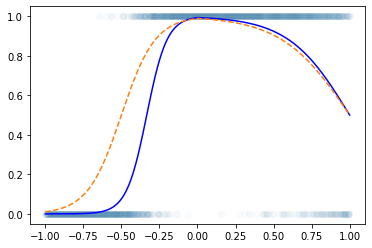

In [28]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(x,df.underlying,'-b')
plt.plot(x,net(x).data,'--')

## Step1 ~ Step4

`-` 준비

In [29]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=2), #u1=l1(x), x:(n,1) --> u1:(n,2) 
    torch.nn.ReLU(), # v1=a1(u1), u1:(n,2) --> v1:(n,2) 
    torch.nn.Linear(in_features=2,out_features=1), # u2=l2(v1), v1:(n,2) --> u2:(n,1) 
    torch.nn.Sigmoid() # v2=a2(u2), u2:(n,1) --> v2:(n,1) 
) 

In [30]:
loss_fn = torch.nn.BCELoss()

In [31]:
optimizr = torch.optim.Adam(net.parameters()) # lr은 디폴트값으로..

`-` 반복

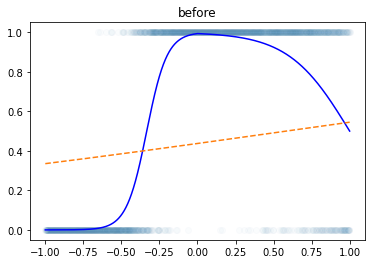

In [32]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(x,df.underlying,'-b')
plt.plot(x,net(x).data,'--')
plt.title("before")

In [33]:
for epoc in range(3000):
    ## step1 
    yhat = net(x) 
    ## step2 
    loss = loss_fn(yhat,y) 
    ## step3
    loss.backward()
    ## step4 
    optimizr.step()
    optimizr.zero_grad()

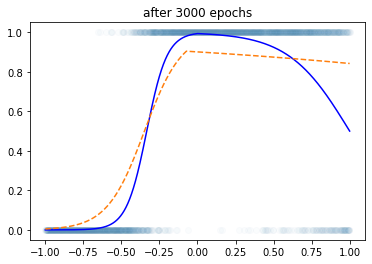

In [34]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(x,df.underlying,'-b')
plt.plot(x,net(x).data,'--',color='C1')
plt.title("after 3000 epochs")

In [35]:
for epoc in range(3000):
    ## step1 
    yhat = net(x) 
    ## step2 
    loss = loss_fn(yhat,y) 
    ## step3
    loss.backward()
    ## step4 
    optimizr.step()
    optimizr.zero_grad()

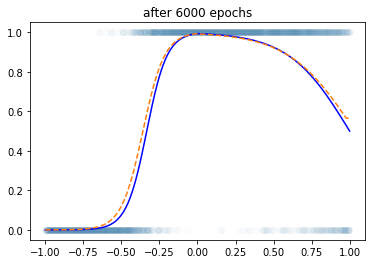

In [36]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(x,df.underlying,'-b')
plt.plot(x,net(x).data,'--',color='C1')
plt.title("after 6000 epochs")

# DNN으로 해결가능한 다양한 예제

## 예제1

`-` 언뜻 생각하면 방금 배운 기술은 sig를 취하기 전이 꺽은선인 형태만
가능할 듯 하다. $\to$ 그래서 이 역시 표현력이 부족할 듯 하다. $\to$
그런데 생각보다 표현력이 풍부한 편이다. 즉 생각보다 쓸 만하다.

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/master/posts/II.%20DNN/2022-10-04-dnnex1.csv')

In [124]:
x = torch.tensor(df.x).float().reshape(-1,1)
y = torch.tensor(df.y).float().reshape(-1,1)

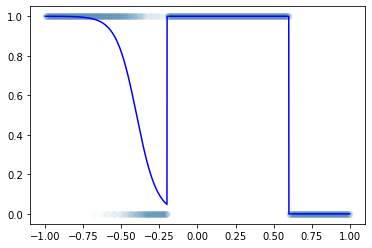

In [126]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(df.x,df.underlying,'-b')

-   이거 시그모이드 취하기 직전은 step이 포함된 듯 $\to$ 그래서
    꺽은선으로는 표현할 수 없는 구조임 $\to$ 그런데 사실 대충은 표현가능

In [127]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=16), # x:(n,1) --> u1:(n,16) 
    torch.nn.ReLU(), # u1:(n,16) --> v1:(n,16)
    torch.nn.Linear(in_features=16,out_features=1), # v1:(n,16) --> u2:(n,1) 
    torch.nn.Sigmoid() # u2:(n,1) --> v2:(n,1) 
)

-   $\underset{(n,1)}{\bf X} \overset{l_1}{\to} \underset{(n,16)}{\boldsymbol u^{(1)}} \overset{a_1}{\to} \underset{(n,16)}{\boldsymbol v^{(1)}} \overset{l_1}{\to} \underset{(n,1)}{\boldsymbol u^{(2)}} \overset{a_2}{\to} \underset{(n,1)}{\boldsymbol v^{(2)}}=\underset{(n,1)}{\hat{\boldsymbol y}}$

In [128]:
loss_fn = torch.nn.BCELoss()

In [129]:
optimizr = torch.optim.Adam(net.parameters())

In [130]:
for epoc in range(6000):
    ## 1
    yhat = net(x) 
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()    

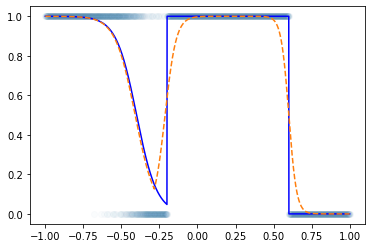

In [134]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(df.x,df.underlying,'-b')
plt.plot(x,net(x).data,'--')

## 예제2

`-` 사실 꺽은선의 조합으로 꽤 많은걸 표현할 수 있거든요? $\to$ 심지어
곡선도 대충 맞게 적합된다.

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/master/posts/II.%20DNN/2022-10-04-dnnex2.csv')

In [281]:
x = torch.tensor(df.x).float().reshape(-1,1)
y = torch.tensor(df.y).float().reshape(-1,1)

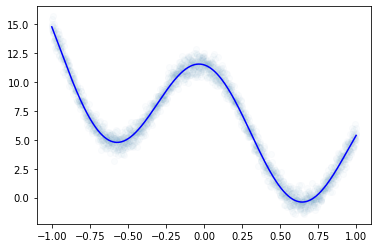

In [282]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(df.x,df.underlying,'-b')

In [283]:
x=torch.tensor(df.x).float().reshape(-1,1)
y=torch.tensor(df.y).float().reshape(-1,1)

(풀이1)

In [284]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=32), # x:(n,1) --> u1:(n,32)
    torch.nn.ReLU(), # u1:(n,32) --> v1:(n,32) 
    torch.nn.Linear(in_features=32,out_features=1) # v1:(n,32) --> u2:(n,1)
)

-   $\underset{(n,1)}{\bf X} \overset{l_1}{\to} \underset{(n,32)}{\boldsymbol u^{(1)}} \overset{a_1}{\to} \underset{(n,32)}{\boldsymbol v^{(1)}} \overset{l_1}{\to} \underset{(n,1)}{\boldsymbol u^{(2)}}=\underset{(n,1)}{\hat{\boldsymbol y}}$

In [285]:
loss_fn = torch.nn.MSELoss() 

In [286]:
optimizr = torch.optim.Adam(net.parameters())

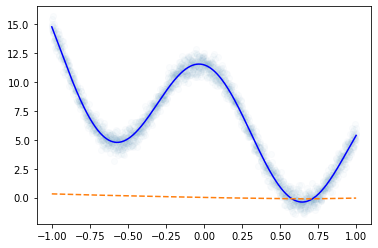

In [287]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(df.x,df.underlying,'-b')
plt.plot(x,net(x).data,'--')

In [288]:
for epoc in range(6000): 
    ## 1 
    yhat = net(x) 
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

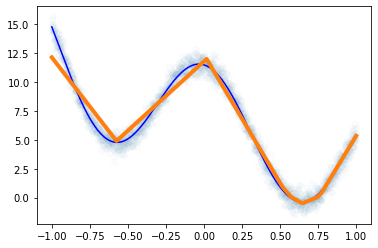

In [289]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(df.x,df.underlying,'-b')
plt.plot(x,net(x).data,lw=4)

(풀이2) – 풀이1보다 좀 더 잘맞음. 잘 맞는 이유? 좋은초기값 (=운)

In [290]:
torch.manual_seed(5)
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=32), # x:(n,1) --> u1:(n,32)
    torch.nn.ReLU(), # u1:(n,32) --> v1:(n,32) 
    torch.nn.Linear(in_features=32,out_features=1) # v1:(n,32) --> u2:(n,1)
)

-   $\underset{(n,1)}{\bf X} \overset{l_1}{\to} \underset{(n,32)}{\boldsymbol u^{(1)}} \overset{a_1}{\to} \underset{(n,32)}{\boldsymbol v^{(1)}} \overset{l_1}{\to} \underset{(n,1)}{\boldsymbol u^{(2)}}=\underset{(n,1)}{\hat{\boldsymbol y}}$

In [291]:
loss_fn = torch.nn.MSELoss() 

In [292]:
optimizr = torch.optim.Adam(net.parameters())

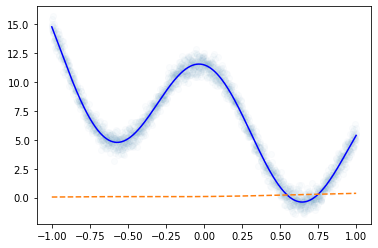

In [293]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(df.x,df.underlying,'-b')
plt.plot(x,net(x).data,'--')

In [294]:
for epoc in range(6000): 
    ## 1 
    yhat = net(x) 
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

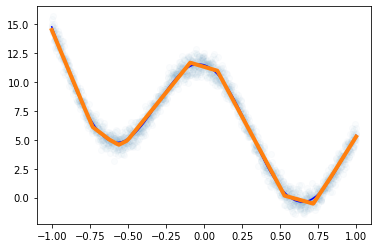

In [295]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(df.x,df.underlying,'-b')
plt.plot(x,net(x).data,lw=4)

-   풀이1에서 에폭을 많이 반복하면 풀이2의 적합선이 나올까? –\> 안나옴!!
    (local min에 빠졌다)

## 예제3

In [296]:
import seaborn as sns

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/master/posts/II.%20DNN/2022-10-04-dnnex3.csv')
df

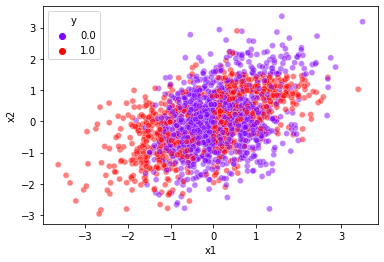

In [298]:
sns.scatterplot(data=df,x='x1',y='x2',hue='y',alpha=0.5,palette={0:(0.5, 0.0, 1.0),1:(1.0,0.0,0.0)})

In [299]:
x1 = torch.tensor(df.x1).float().reshape(-1,1) 
x2 = torch.tensor(df.x2).float().reshape(-1,1) 
X = torch.concat([x1,x2],axis=1) 
y = torch.tensor(df.y).float().reshape(-1,1) 

In [300]:
X.shape

In [301]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=2,out_features=32),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=32,out_features=1),
    torch.nn.Sigmoid()
)

-   $\underset{(n,2)}{\bf X} \overset{l_1}{\to} \underset{(n,32)}{\boldsymbol u^{(1)}} \overset{a_1}{\to} \underset{(n,32)}{\boldsymbol v^{(1)}} \overset{l_1}{\to} \underset{(n,1)}{\boldsymbol u^{(2)}} \overset{a_2}{\to} \underset{(n,1)}{\boldsymbol v^{(2)}}=\underset{(n,1)}{\hat{\boldsymbol y}}$

In [302]:
loss_fn = torch.nn.BCELoss() 

In [303]:
optimizr = torch.optim.Adam(net.parameters()) 

In [304]:
for epoc in range(3000):
    ## 1 
    yhat = net(X) 
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad() 

In [305]:
df2 = df.assign(yhat=yhat.reshape(-1).detach().tolist())
df2

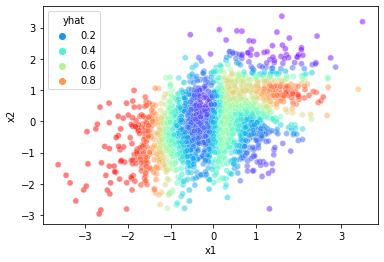

In [306]:
sns.scatterplot(data=df2,x='x1',y='x2',hue='yhat',alpha=0.5,palette='rainbow')

`-` 결과시각화

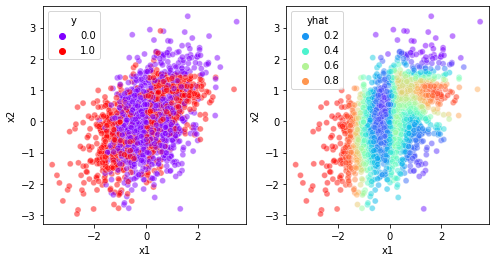

In [307]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
sns.scatterplot(data=df,x='x1',y='x2',hue='y',alpha=0.5,palette={0:(0.5, 0.0, 1.0),1:(1.0,0.0,0.0)},ax=ax[0])
sns.scatterplot(data=df2,x='x1',y='x2',hue='yhat',alpha=0.5,palette='rainbow',ax=ax[1])

`-` 교훈: underlying이 엄청 이상해보여도 생각보다 잘 맞춤

# Appedix: 데이터 생성코드

In [62]:
import numpy as np

`-` motivating example

In [98]:
np.random.seed(43052)
x = np.linspace(-1,1,2000).tolist()
transform = lambda x: x*15+5 if x<0 else x*(-5) +5 
u = list(map(transform,x))
v = torch.nn.Sigmoid()(torch.tensor(u))
y = torch.bernoulli(v)
pd.DataFrame({'x':x, 'underlying':v,'y':y}).to_csv("2022-10-04-dnnex0.csv",index=False)

`-` 예제1

In [63]:
np.random.seed(43052)
x = np.linspace(-1,1,2000).tolist()
def transfrom(x):
    if x< -0.2:
        return -15*x-6
    elif x< 0.6:
        return 9
    else:
        return -9
u = list(map(transfrom,x))
v = torch.nn.Sigmoid()(torch.tensor(u))
y = torch.bernoulli(v)
pd.DataFrame({'x':x, 'underlying':v,'y':y}).to_csv("2022-10-04-dnnex1.csv",index=False)

`-` 예제2

In [100]:
torch.manual_seed(43052)
x = torch.linspace(-1,1,2000)
eps = torch.randn(2000)*0.5
fx =  2.5+4*torch.exp(-x) + 5*torch.cos(5*x) 
y = fx + eps
pd.DataFrame({'x':x, 'underlying':fx,'y':y}).to_csv("2022-10-04-dnnex2.csv",index=False)

`-` 예제3

In [160]:
x1,x2 = np.random.multivariate_normal([0,0],[[1,0.5],[0.5,1]],2000).T

In [292]:
np.random.seed(43052)
idx = np.linspace(-1,1,2000).tolist()
def transfrom1(x1,x2):
    if x1< 0:
        return -3*x1-3
    elif x1< 0.6:
        return 0
    elif x2>1.5:
        return -0.5*(x1)**2-10*x2+5
    else:
        return x1+2*x2-2
    
u = torch.tensor(list(map(transfrom1,x1,x2)))
v = torch.nn.Sigmoid()(u)
y = torch.bernoulli(v)
pd.DataFrame({'x1':x1, 'x2':x2, 'y':y}).to_csv("2022-10-04-dnnex3.csv",index=False)